# Significance testing 

### Setup

In [1]:
# Load packages
!pip install pandas 
!pip install matplotlib
!pip install pingouin
!pip install numpy scipy statsmodels
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import numpy as np
import scipy.stats as stats

from pingouin import multivariate_normality
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Significance testing on Cornell sub

In [2]:
# Load data
data_cornell_sub = pd.read_csv('/work/VNV/Module 3 - Emotion analysis/data/original_14_emotions_dataset.csv') 
print(data_cornell_sub.head(10))

   lineID characterID movieID character_name  \
0  L1045           u0      m0         BIANCA   
1  L1044           u2      m0        CAMERON   
2   L985           u0      m0         BIANCA   
3   L984           u2      m0        CAMERON   
4   L925           u0      m0         BIANCA   
5   L924           u2      m0        CAMERON   
6   L872           u0      m0         BIANCA   
7   L871           u2      m0        CAMERON   
8   L870           u0      m0         BIANCA   
9   L869           u0      m0         BIANCA   

                                                text  gender  movie_year  \
0                                       They do not!  female        1999   
1                                        They do to!    male        1999   
2                                         I hope so.  female        1999   
3                                          She okay?    male        1999   
4                                          Let's go.  female        1999   
5              

### Prepare dataset for significance testing

In [3]:
# Select relevant columns
gender_cornell_sub = data_cornell_sub["gender"]
emotions_cornell_sub = data_cornell_sub[["characterID", "sadness", "joy", "love", "anger", "fear", "surprise",
    "guilt", "despair", "disapproval", "envy", "delight",
    "pride", "outrage", "awe"]]

# Group by 'characterID' and calculate the mean for each emotion
emotions_cornell_sub = emotions_cornell_sub.groupby('characterID').mean()

# Add the gender information (based on characterID)
gender_cornell_sub = data_cornell_sub[['characterID', 'gender']].drop_duplicates()

# Merge the grouped emotions data frame with the gender data frame
df_cornell_sub = pd.merge(emotions_cornell_sub, gender_cornell_sub, on='characterID', how='left')

# Inspect the data frame
print(df_cornell_sub)
print(df_cornell_sub.columns)
print(df_cornell_sub.describe())

     characterID   sadness       joy      love     anger      fear  surprise  \
0             u0  0.082897  0.368019  0.031799  0.332440  0.100381  0.005030   
1            u10  0.052220  0.326741  0.012579  0.427660  0.106507  0.007872   
2           u100  0.112240  0.168361  0.019040  0.473886  0.171714  0.003363   
3          u1001  0.020033  0.145161  0.002240  0.732235  0.036211  0.003683   
4          u1003  0.037386  0.280888  0.004630  0.347342  0.246024  0.020892   
...          ...       ...       ...       ...       ...       ...       ...   
2876        u994  0.068023  0.191970  0.002759  0.455326  0.159981  0.017340   
2877        u995  0.010181  0.219464  0.002755  0.515254  0.194027  0.005766   
2878        u996  0.020998  0.449694  0.024440  0.338950  0.106346  0.007036   
2879        u997  0.101627  0.391137  0.008771  0.269389  0.152681  0.004987   
2880        u998  0.071832  0.401822  0.007346  0.286940  0.165015  0.004129   

         guilt   despair  disapproval  

### Normality testing

In [4]:
# Select emotion columns only for assumptions testing
df_cornell_sub_assumptions_testing = df_cornell_sub[["sadness", "joy", "love", "anger", "fear", "surprise",
    "guilt", "despair", "disapproval", "envy", "delight",
    "pride", "outrage", "awe"]]

In [5]:
# Henze-Zirkler multivariate normality test
print(multivariate_normality(df_cornell_sub_assumptions_testing, alpha=.05))

HZResults(hz=11524, pval=np.float64(0.0), normal=False)


### Mann-Whitney U Test

In [7]:
# Create an empty dictionary 
results = {}

# Loop through each emotion column
for emotion in ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'guilt', 'despair', 'disapproval', 'envy', 'delight', 'pride', 'outrage', 'awe']:
    # Extract data for each gender for this emotion
    f_data = df_cornell_sub[df_cornell_sub['gender'] == 'female'][emotion]
    m_data = df_cornell_sub[df_cornell_sub['gender'] == 'male'][emotion]
    
    # Perform Mann-Whitney U Test
    U1, p_val = mannwhitneyu(f_data, m_data, alternative='two-sided')
    U2 = len(f_data) * len(m_data) - U1  # Compute the complementary U score
    
    # Save results
    results[emotion] = {'U1': U1, 'U2': U2, 'p_value': p_val}

# Convert results to a DataFrame 
results_df_cornell_sub = pd.DataFrame(results).T

# Bonferroni correction of p-values
corrected_p = multipletests(results_df_cornell_sub['p_value'], method='bonferroni')[1]

# Add the corrected p-values as a new column
results_df_cornell_sub['bonferroni_corrected_p'] = corrected_p
print(results_df_cornell_sub)

                    U1        U2       p_value  bonferroni_corrected_p
sadness       961195.0  771035.0  3.138794e-06            4.394311e-05
joy           818949.0  913281.0  2.075496e-02            2.905695e-01
love         1047521.0  684709.0  5.901097e-19            8.261535e-18
anger         772465.0  959765.0  4.402560e-06            6.163585e-05
fear          946780.0  785450.0  7.660227e-05            1.072432e-03
surprise      958254.0  773976.0  6.262373e-06            8.767322e-05
guilt         899398.0  832832.0  1.027296e-01            1.000000e+00
despair       956091.0  776139.0  1.027589e-05            1.438625e-04
disapproval   979790.0  752440.0  2.501154e-08            3.501616e-07
envy          881980.0  850250.0  4.366877e-01            1.000000e+00
delight       928336.0  803894.0  2.284429e-03            3.198201e-02
pride         743915.0  988315.0  2.083607e-09            2.917050e-08
outrage       861502.0  870728.0  8.210926e-01            1.000000e+00
awe   

### Significance testing on Cornell + Genderize sub

In [8]:
# Load data
data_cornell_genderize = pd.read_csv('/work/VNV/Module 3 - Emotion analysis/data/genderize_14_emotions_dataset.csv') 
print(data_cornell_genderize.head(10))

   lineID characterID movieID character_name  \
0  L1045           u0      m0         BIANCA   
1  L1044           u2      m0        CAMERON   
2   L985           u0      m0         BIANCA   
3   L984           u2      m0        CAMERON   
4   L925           u0      m0         BIANCA   
5   L924           u2      m0        CAMERON   
6   L872           u0      m0         BIANCA   
7   L871           u2      m0        CAMERON   
8   L870           u0      m0         BIANCA   
9   L869           u0      m0         BIANCA   

                                                text  gender  movie_year  \
0                                       They do not!  female        1999   
1                                        They do to!    male        1999   
2                                         I hope so.  female        1999   
3                                          She okay?    male        1999   
4                                          Let's go.  female        1999   
5              

### Prepare dataset for significance testing

In [9]:
# Select relevant columns
gender_cornell_genderize = data_cornell_genderize["gender"]
emotions_cornell_genderize = data_cornell_genderize[["characterID", "sadness", "joy", "love", "anger", "fear", "surprise",
    "guilt", "despair", "disapproval", "envy", "delight",
    "pride", "outrage", "awe"]]

# Group by 'characterID' and calculate the mean for each emotion 
emotions_cornell_genderize = emotions_cornell_genderize.groupby('characterID').mean()

# Add the gender information (based on characterID)
gender_cornell_genderize = data_cornell_genderize[['characterID', 'gender']].drop_duplicates()

# Merge the grouped emotions data frame with the gender data frame
df_cornell_genderize = pd.merge(emotions_cornell_genderize, gender_cornell_genderize, on='characterID', how='left')

# Inspect the data frame
print(df_cornell_genderize)
print(df_cornell_genderize.columns)
print(df_cornell_genderize.describe())

     characterID   sadness       joy      love     anger      fear  surprise  \
0             u0  0.082897  0.368019  0.031799  0.332440  0.100381  0.005030   
1            u10  0.052220  0.326741  0.012579  0.427660  0.106507  0.007872   
2           u100  0.112240  0.168361  0.019040  0.473886  0.171714  0.003363   
3          u1001  0.020033  0.145161  0.002240  0.732235  0.036211  0.003683   
4          u1003  0.037386  0.280888  0.004630  0.347342  0.246024  0.020892   
...          ...       ...       ...       ...       ...       ...       ...   
5924        u994  0.068023  0.191970  0.002759  0.455326  0.159981  0.017340   
5925        u995  0.010181  0.219464  0.002755  0.515254  0.194027  0.005766   
5926        u996  0.020998  0.449694  0.024440  0.338950  0.106346  0.007036   
5927        u997  0.101627  0.391137  0.008771  0.269389  0.152681  0.004987   
5928        u998  0.071832  0.401822  0.007346  0.286940  0.165015  0.004129   

         guilt   despair  disapproval  

### Normality testing

In [10]:
# Select emotion columns for assumptions testing
df_cornell_genderize_assumptions_testing = df_cornell_genderize[["sadness", "joy", "love", "anger", "fear", "surprise",
    "guilt", "despair", "disapproval", "envy", "delight",
    "pride", "outrage", "awe"]]

# Henze-Zirkler multivariate normality test
print(multivariate_normality(df_cornell_genderize_assumptions_testing, alpha=.05))

HZResults(hz=23716, pval=np.float64(0.0), normal=False)


### Mann-Whitney U Test

In [11]:
# Create an empty dictionary 
results = {}

# Loop through each emotion column
for emotion in ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise', 'guilt', 'despair', 'disapproval', 'envy', 'delight', 'pride', 'outrage', 'awe']:
    # Extract data for each gender for this emotion
    f_data = df_cornell_genderize[df_cornell_genderize['gender'] == 'female'][emotion]
    m_data = df_cornell_genderize[df_cornell_genderize['gender'] == 'male'][emotion]
    
    # Perform Mann-Whitney U Test
    U1, p_val = mannwhitneyu(f_data, m_data, alternative='two-sided')
    U2 = len(f_data) * len(m_data) - U1  # Compute the complementary U score
    
    # Save results
    results[emotion] = {'U1': U1, 'U2': U2, 'p_value': p_val}

# Convert results to a data frame 
results_df_cornell_genderize = pd.DataFrame(results).T

# Bonferroni correction of p-values
corrected_p = multipletests(results_df_cornell_genderize['p_value'], method='bonferroni')[1]

# Add the corrected p-values as a new column
results_df_cornell_genderize['bonferroni_corrected_p'] = corrected_p
print(results_df_cornell_genderize)

                    U1         U2       p_value  bonferroni_corrected_p
sadness      4108562.0  3290836.0  1.365804e-11            1.912126e-10
joy          3543349.0  3856049.0  9.720927e-03            1.360930e-01
love         4412467.0  2986931.0  4.540586e-32            6.356820e-31
anger        3312228.0  4087170.0  1.477090e-10            2.067926e-09
fear         4068695.0  3330703.0  1.046210e-09            1.464694e-08
surprise     4036657.0  3362741.0  2.512921e-08            3.518089e-07
guilt        3777311.0  3622087.0  1.993218e-01            1.000000e+00
despair      4066453.0  3332945.0  1.318557e-09            1.845980e-08
disapproval  4112980.0  3286418.0  8.226219e-12            1.151671e-10
envy         3801457.0  3597941.0  9.241456e-02            1.000000e+00
delight      3905983.0  3493415.0  6.463592e-04            9.049029e-03
pride        3192211.0  4207187.0  4.759838e-17            6.663774e-16
outrage      3669480.0  3729918.0  6.172631e-01            1.000

### Plot barplots for significant emotions

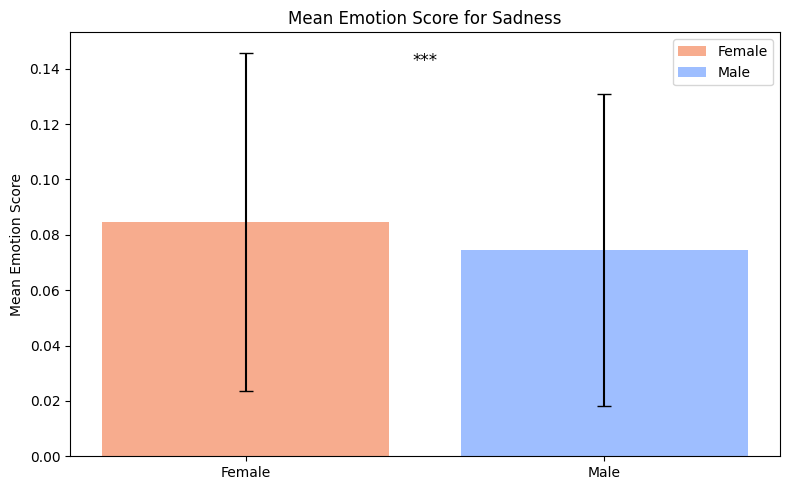

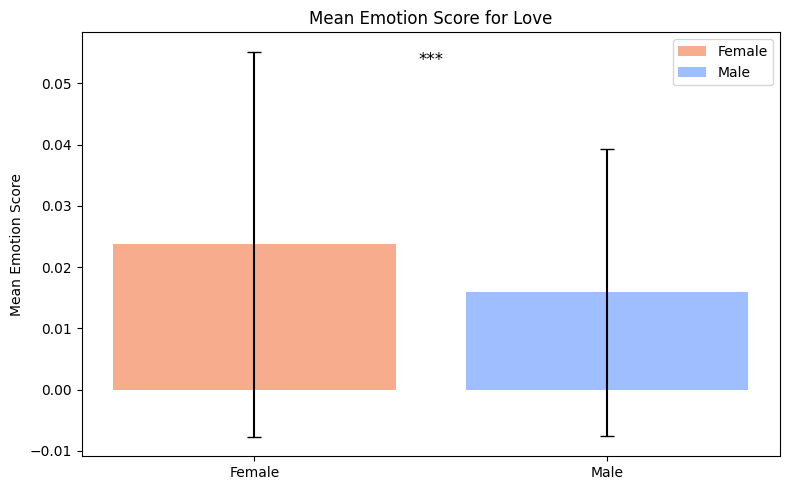

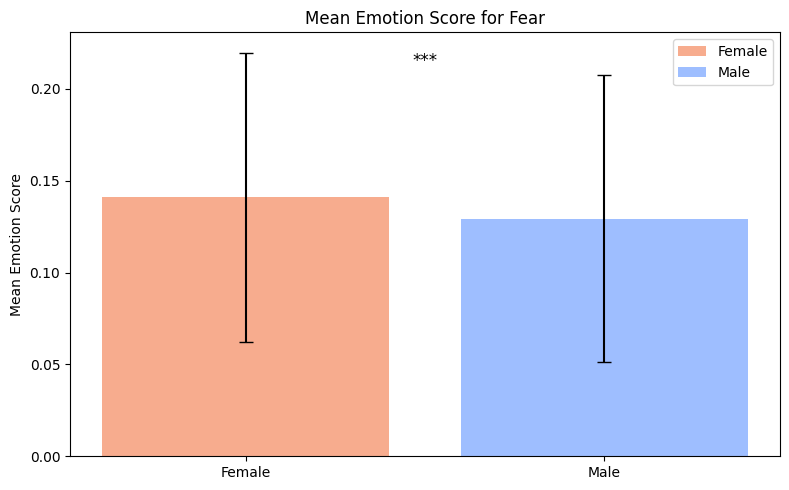

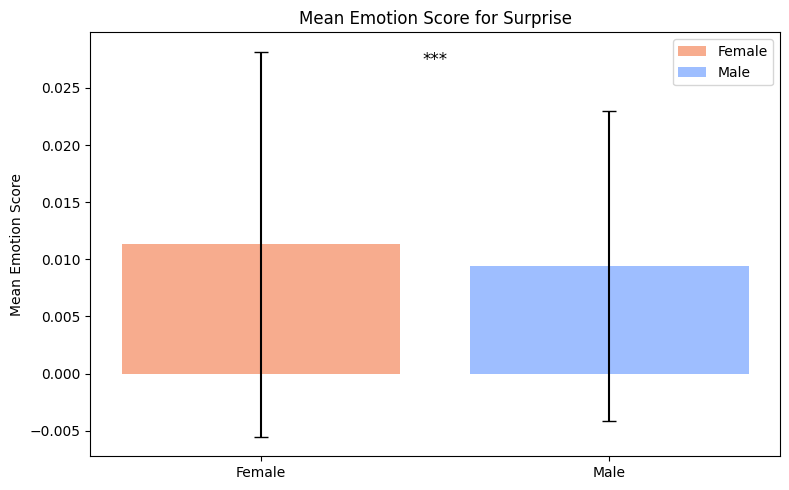

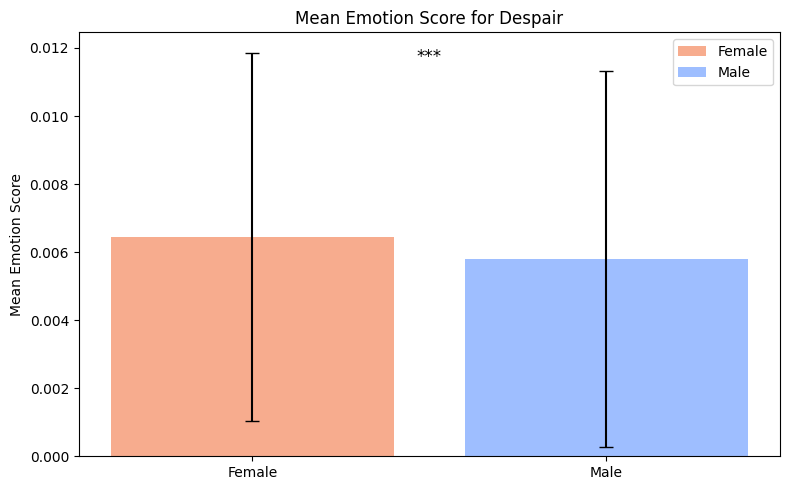

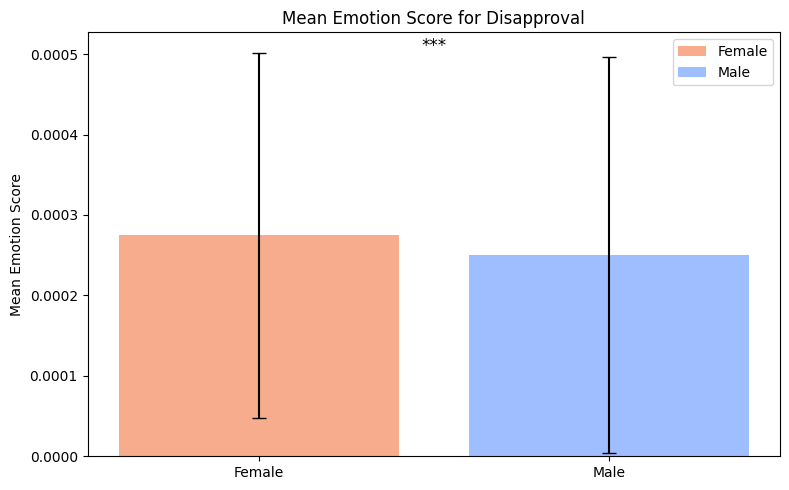

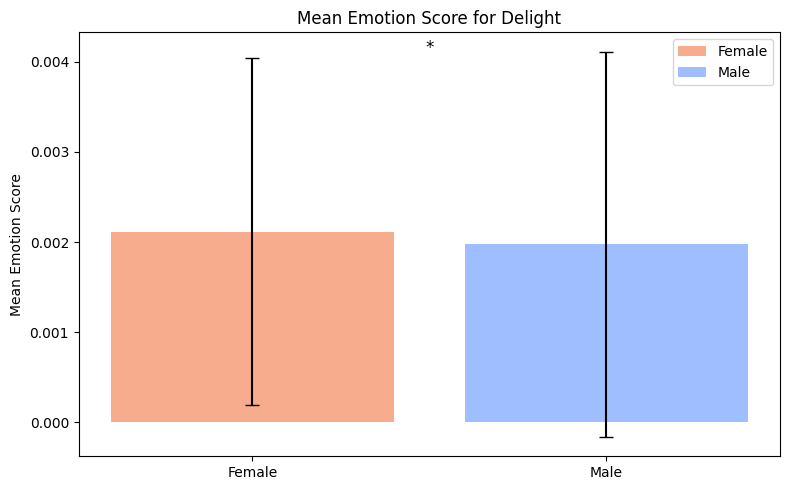

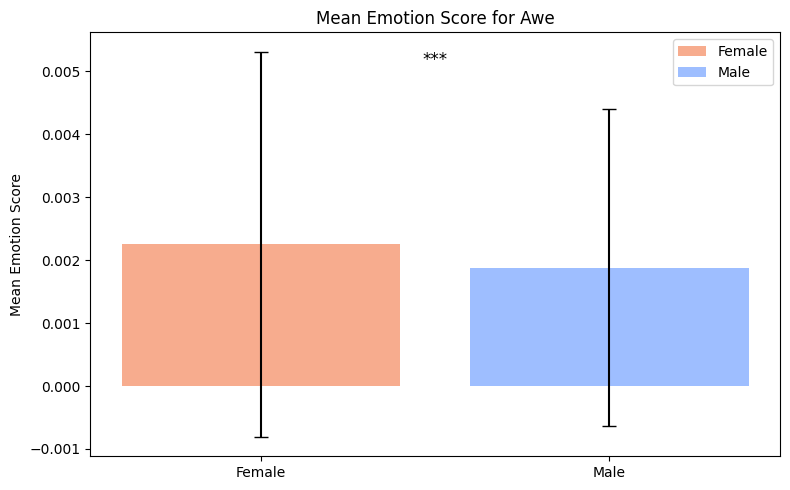

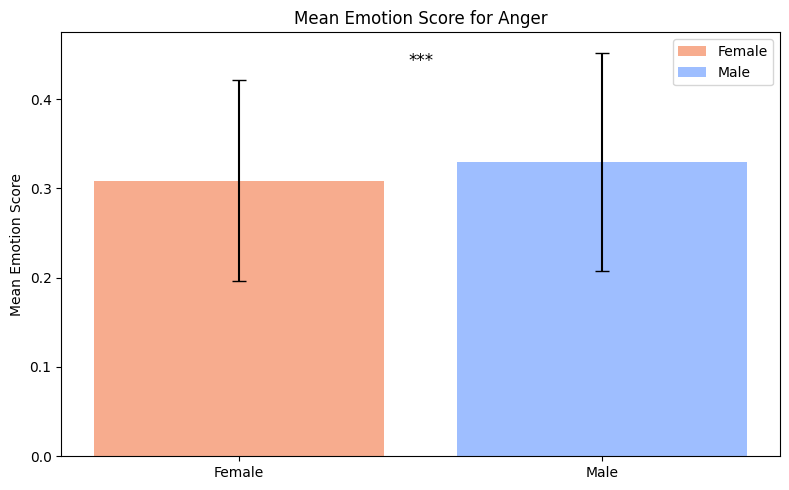

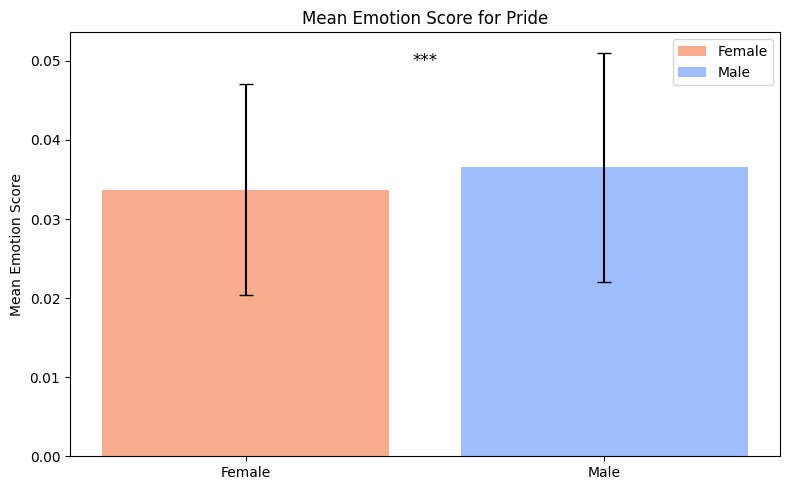

In [12]:
# Select emotions to plot
emotions_to_plot = ["sadness", "love", "fear", "surprise", "despair", "disapproval", "delight", "awe", "anger", "pride"]

# Group by gender and calculate mean and standard deviation for the selected emotions
mean_emotion_scores = df_cornell_genderize.groupby('gender')[emotions_to_plot].mean(numeric_only=True)
std_emotion_scores = df_cornell_genderize.groupby('gender')[emotions_to_plot].std(numeric_only=True)

# Specify colours
female_color = plt.cm.coolwarm_r(0.3)  # Choose a color for female
male_color = plt.cm.coolwarm_r(0.7)    # Choose a color for male

# Define function to add significance stars
def add_significance_annotation(ax, x, y, p_value):
    # Based on p-value, annotate with *, **, or ***
    if p_value < 0.001:
        ax.annotate('***', (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=12, color='black')
    elif p_value < 0.01:
        ax.annotate('**', (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=12, color='black')
    elif p_value < 0.05:
        ax.annotate('*', (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=12, color='black')

# Plot each emotion 
for emotion in emotions_to_plot:
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Get the mean and std values for male and female
    female_mean = mean_emotion_scores.loc['female', emotion]
    male_mean = mean_emotion_scores.loc['male', emotion]
    female_std = std_emotion_scores.loc['female', emotion]
    male_std = std_emotion_scores.loc['male', emotion]
    
    # Apply the same colors for both genders across all emotions
    ax.bar('Female', female_mean, 
           yerr=female_std, capsize=5, 
           color=female_color, label='Female')
    ax.bar('Male', male_mean, 
           yerr=male_std, capsize=5, 
           color=male_color, label='Male')
    
    # Perform t-test 
    female_scores = df_cornell_genderize[df_cornell_genderize['gender'] == 'female'][emotion]
    male_scores = df_cornell_genderize[df_cornell_genderize['gender'] == 'male'][emotion]
    t_stat, p_value = stats.ttest_ind(female_scores.dropna(), male_scores.dropna())
    
    # Add significance annotation if p-value is significant
    add_significance_annotation(ax, 0.5, max(female_mean, male_mean) + max(female_std, male_std), p_value)

    # Add labels and title
    ax.set_ylabel('Mean Emotion Score')
    ax.set_title(f'Mean Emotion Score for {emotion.capitalize()}')
    ax.legend()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

### Calculate summary statistics 

In [20]:
# Group by gender and calculate the summary statistics
summary_stats = df_cornell_genderize.groupby('gender')[emotions_to_plot].agg(
    ['mean', 'std', 'min', 'max']
)

# Display the summary statistics table for a specific emotion
summary_stats.round(4)["anger"]

,mean,std,min,max
gender,,,,
female,0.3084,0.1125,0.0035,0.8985
male,0.3301,0.1221,0.0019,0.8422
